<a href="https://colab.research.google.com/github/FIRDAYUNITASARI/student-performance-kmeans-clustering/blob/main/STUDENT_PERFORMANCE_KMEANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive 
drive.mount('/content/drive') 
uts ='/content/drive/MyDrive/data-uts.csv' 
uts = pd.read_csv(uts) 
uts

Mounted at /content/drive


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
uts.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
uts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


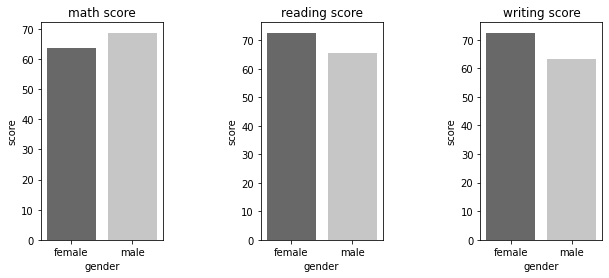

In [ ]:
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)
for idx in range(3):
    plt.subplot(1,3, idx+1)
    gender_uts = uts.groupby("gender")[list(uts.columns[-3:])[idx]].describe()
    sns.barplot(gender_uts.index, gender_uts.loc[:,"mean"].values, palette = "Greys_r")
    plt.ylabel("score")
    plt.title(list(uts.columns[-3:])[idx])
    
plt.show()

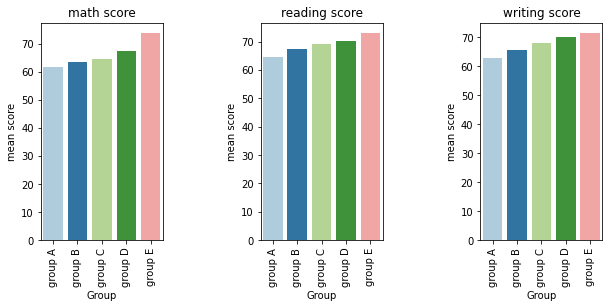

In [ ]:
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)
for idx in range(3):
    plt.subplot(1,3, idx+1)
    ethn_df = uts.groupby("race/ethnicity")[list(uts.columns[-3:])[idx]].mean()
    sns.barplot(x=ethn_df.index, y = ethn_df.values, palette = "Paired")
    plt.xlabel("Group")
    plt.ylabel("mean score")
    plt.xticks(rotation=90)
    plt.title(list(uts.columns[-3:])[idx])

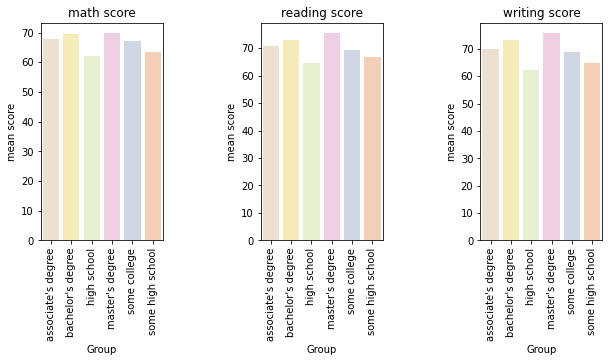

In [ ]:
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)
for idx in range(3):
    plt.subplot(1,3, idx+1)
    ethn_df = uts.groupby("parental level of education")[list(uts.columns[-3:])[idx]].mean()
    sns.barplot(x=ethn_df.index, y = ethn_df.values, palette = "Pastel2_r")
    plt.xlabel("Group")
    plt.ylabel("mean score")
    plt.xticks(rotation=90)
    plt.title(list(uts.columns[-3:])[idx])

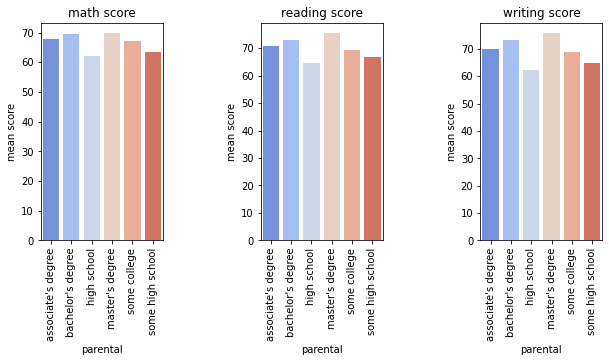

In [ ]:
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)
for idx in range(3):
    plt.subplot(1,3, idx+1)
    ethn_df = uts.groupby("parental level of education")[list(uts.columns[-3:])[idx]].mean()
    sns.barplot(x=ethn_df.index, y = ethn_df.values, palette = "coolwarm")
    plt.xlabel("parental")
    plt.ylabel("mean score")
    plt.xticks(rotation=90)
    plt.title(list(uts.columns[-3:])[idx])

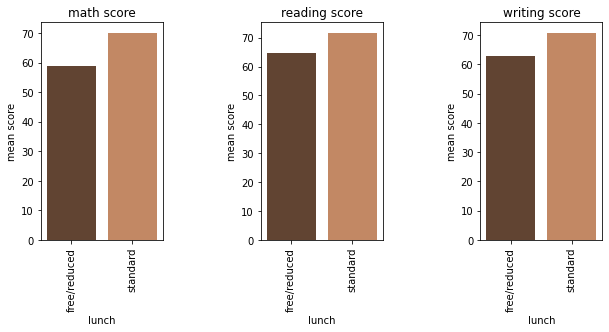

In [ ]:
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)
for idx in range(3):
    plt.subplot(1,3, idx+1)
    ethn_df = uts.groupby("lunch")[list(uts.columns[-3:])[idx]].mean()
    sns.barplot(x=ethn_df.index, y = ethn_df.values, palette = "copper")
    plt.xlabel("lunch")
    plt.ylabel("mean score")
    plt.xticks(rotation=90)
    plt.title(list(uts.columns[-3:])[idx])

Text(0.5, 1.0, 'race/ethnicity')

<Figure size 432x288 with 0 Axes>

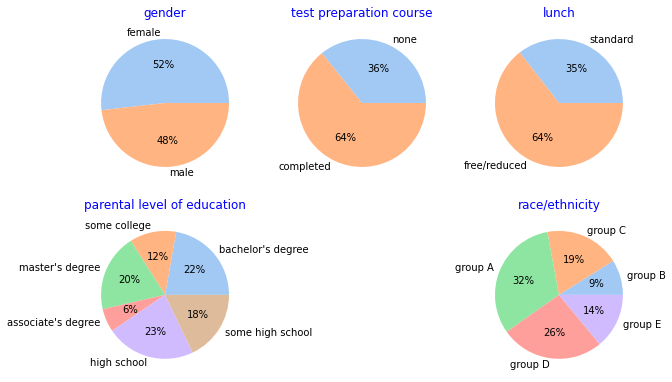

In [ ]:
plt.figure(1)
colors = sns.color_palette('pastel')
fig = plt.figure(figsize=(10,10))
#first row, first column
ax1 = plt.subplot2grid((3,3),(0,0))
plt.pie(uts.groupby('gender').size(), labels =uts['gender'].unique(), autopct='%.0f%%', colors=colors)
plt.title('gender', color='blue')

#Second row first column
ax1 = plt.subplot2grid((3,3), (0,1))
plt.pie(uts.groupby('test preparation course').size(), labels =uts['test preparation course'].unique(), autopct='%.0f%%', colors=colors)
plt.title('test preparation course', color='blue')
#second row second column
ax1 = plt.subplot2grid((3,3), (0, 2))
plt.pie(uts.groupby('lunch').size(), labels =uts['lunch'].unique(), autopct='%.0f%%', colors=colors)
plt.title('lunch', color='blue')

#third row first column
ax1 = plt.subplot2grid((3,3), (1, 0))
plt.pie(uts.groupby('parental level of education').size(), labels =uts['parental level of education'].unique(), autopct='%.0f%%', colors=colors)
plt.title('parental level of education', color='blue')

ax1 = plt.subplot2grid((3,3), (1,2))
plt.pie(uts.groupby('race/ethnicity').size(), labels =uts['race/ethnicity'].unique(), autopct='%.0f%%', colors=colors)
plt.title('race/ethnicity', color='blue')

In [ ]:
labelencoder = LabelEncoder
labelencoder = LabelEncoder()
uts['gender'] = labelencoder.fit_transform(uts['gender'])
uts['race/ethnicity'] = labelencoder.fit_transform(uts['race/ethnicity'])
uts['parental level of education'] = labelencoder.fit_transform(uts['parental level of education'])
uts['lunch'] = labelencoder.fit_transform(uts['lunch'])
uts['test preparation course'] = labelencoder.fit_transform(uts['test preparation course'])
uts

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75
...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95
996,1,2,2,0,1,62,55,55
997,0,2,2,0,0,59,71,65
998,0,3,4,1,0,68,78,77


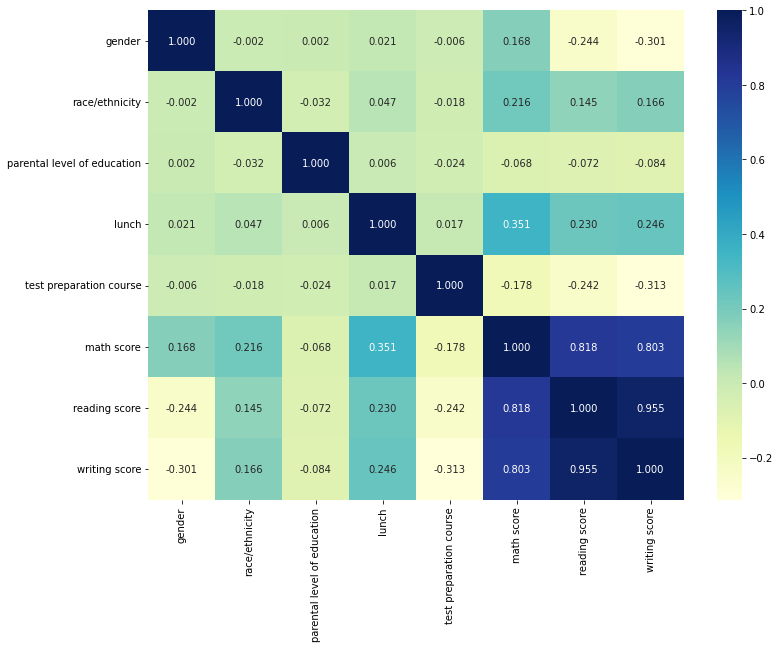

In [ ]:
plt.figure(figsize=(12,9))
sns.heatmap(uts.corr(), annot = True, fmt = '.3f', cmap = 'YlGnBu')

In [ ]:
#menghapus variabel dependen
utss = uts.drop(['gender','race/ethnicity','lunch','parental level of education',
    'lunch','test preparation course' ], axis = 1)
utss

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


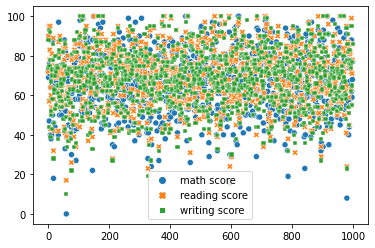

In [ ]:
sns.scatterplot(data = utss)

In [ ]:
array_utss = np.array(utss)
array_utss

array([[72, 72, 74],
       [69, 90, 88],
       [90, 95, 93],
       ...,
       [59, 71, 65],
       [68, 78, 77],
       [77, 86, 86]])

In [ ]:
#mengskalakan nilai data ke dalam suatu range = MinMaxScaler
scaler = MinMaxScaler()
scaled_utss = scaler.fit_transform(array_utss)
scaled_utss

array([[0.72      , 0.6626506 , 0.71111111],
       [0.69      , 0.87951807, 0.86666667],
       [0.9       , 0.93975904, 0.92222222],
       ...,
       [0.59      , 0.65060241, 0.61111111],
       [0.68      , 0.73493976, 0.74444444],
       [0.77      , 0.8313253 , 0.84444444]])

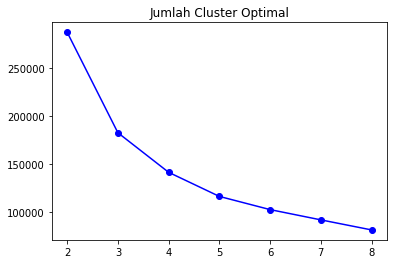

In [ ]:
Sum_of_squared_distances = []
K = range(2,9)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(uts)
    Sum_of_squared_distances.append(km.inertia_) 
plt.plot(K, Sum_of_squared_distances, 'bo-')
plt.title('Jumlah Cluster Optimal')
plt.show()

In [ ]:
k = KMeans(n_clusters= 3, random_state = 42)

#menampilkan nilai centroid
k.fit(scaled_utss)
print(k.cluster_centers_)

[[0.81432258 0.8212981  0.82523297]
 [0.48873563 0.40889997 0.43094934]
 [0.65475524 0.62288314 0.64509195]]


In [ ]:
sortt = np.sort(k.cluster_centers_, axis = 1)
sortt

array([[0.81432258, 0.8212981 , 0.82523297],
       [0.40889997, 0.43094934, 0.48873563],
       [0.62288314, 0.64509195, 0.65475524]])

In [ ]:
utss['kluster'] = k.labels_
print(k.labels_)

[2 0 0 1 0 0 0 1 2 1 1 1 2 2 1 2 0 1 1 1 2 2 1 2 2 2 1 2 2 2 2 2 2 1 0 0 0
 2 0 1 1 2 2 2 1 1 2 2 2 0 1 2 1 0 0 1 0 1 1 1 2 1 2 2 1 2 1 2 1 1 2 2 1 1
 1 1 1 0 2 2 1 1 1 2 1 0 0 2 2 0 2 1 2 1 0 0 2 2 2 2 2 2 0 1 0 2 0 2 2 2 0
 1 1 1 0 0 0 0 2 2 0 0 0 1 0 0 2 2 0 1 0 1 0 0 0 1 1 2 2 2 2 2 1 1 0 1 0 2
 2 0 2 2 2 1 2 0 2 2 0 2 0 0 1 1 0 0 1 2 0 2 2 0 0 2 1 0 1 2 2 0 2 2 1 2 1
 2 2 2 1 0 2 0 2 2 0 1 2 1 1 0 0 2 2 2 1 2 2 0 0 2 0 1 1 1 0 0 0 1 2 1 2 0
 2 0 2 1 2 1 2 0 2 1 0 0 0 0 2 2 1 0 2 0 1 1 2 0 0 2 2 2 1 0 2 0 1 2 2 0 2
 0 2 0 1 0 2 1 2 2 0 2 2 1 1 2 0 0 0 2 0 2 1 1 0 0 1 0 0 0 0 0 2 2 2 2 0 2
 1 2 1 0 0 1 0 2 0 2 0 1 2 1 0 2 2 2 2 2 0 0 2 2 0 0 0 1 1 0 2 1 0 1 2 1 1
 0 0 2 2 1 1 1 1 2 2 2 2 0 2 0 2 0 2 1 2 1 2 2 2 2 2 0 2 0 1 1 2 1 2 2 1 0
 0 2 2 0 2 1 0 0 0 2 0 0 0 1 1 2 2 2 2 2 2 2 2 1 2 1 2 0 2 1 2 1 1 0 2 2 2
 0 1 0 2 0 2 2 2 2 2 2 2 1 0 2 1 0 1 2 0 2 1 2 2 2 1 1 2 1 2 2 1 0 0 0 2 0
 0 2 2 0 1 2 0 0 2 1 2 1 0 1 0 2 1 1 2 0 2 0 1 2 0 0 0 2 0 2 0 0 2 2 2 2 2
 1 2 1 1 2 1 2 1 0 0 2 0 

In [ ]:
print(utss.kluster)

0      2
1      0
2      0
3      1
4      0
      ..
995    0
996    1
997    2
998    2
999    0
Name: kluster, Length: 1000, dtype: int32


In [ ]:
uts['cluster'] = k.labels_
uts

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,cluster
0,0,1,1,1,1,72,72,74,2
1,0,2,4,1,0,69,90,88,0
2,0,1,3,1,1,90,95,93,0
3,1,0,0,0,1,47,57,44,1
4,1,2,4,1,1,76,78,75,0
...,...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95,0
996,1,2,2,0,1,62,55,55,1
997,0,2,2,0,0,59,71,65,2
998,0,3,4,1,0,68,78,77,2


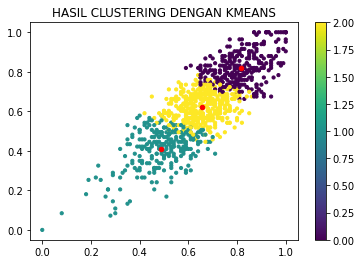

In [ ]:
outputt = plt.scatter(scaled_utss[:,0], scaled_utss[:,1], s = 10, c = utss.kluster )
centers = k.cluster_centers_
plt.scatter(centers[:,0], centers[0:,1], c ='red', s = 20, alpha = 1, marker = 'o')
plt.title('HASIL CLUSTERING DENGAN KMEANS')
plt.colorbar(outputt)
plt.show()

In [ ]:
uts[uts['cluster']== 0].head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,cluster
1,0,2,4,1,0,69,90,88,0
2,0,1,3,1,1,90,95,93,0
4,1,2,4,1,1,76,78,75,0
5,0,1,0,1,1,71,83,78,0
6,0,1,4,1,0,88,95,92,0
16,1,2,2,1,1,88,89,86,0
34,1,4,4,1,1,97,87,82,0
35,1,4,0,1,0,81,81,79,0
36,0,3,0,1,1,74,81,83,0
38,0,3,0,0,0,75,90,88,0


In [ ]:
uts[uts['cluster']== 1].head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,cluster
3,1,0,0,0,1,47,57,44,1
7,1,1,4,0,1,40,43,39,1
9,0,1,2,0,1,38,60,50,1
10,1,2,0,1,1,58,54,52,1
11,1,3,0,1,1,40,52,43,1
14,0,0,3,1,1,50,53,58,1
17,0,1,5,0,1,18,32,28,1
18,1,2,3,0,0,46,42,46,1
19,0,2,0,0,1,54,58,61,1
22,1,3,4,1,1,44,54,53,1


In [ ]:
uts[uts['cluster']== 2].head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,cluster
0,0,1,1,1,1,72,72,74,2
8,1,3,2,0,0,64,64,67,2
12,0,1,2,1,1,65,81,73,2
13,1,0,4,1,0,78,72,70,2
15,0,2,5,1,1,69,75,78,2
20,1,3,2,1,1,66,69,63,2
21,0,1,4,0,0,65,75,70,2
23,0,2,5,1,1,69,73,73,2
24,1,3,1,0,0,74,71,80,2
25,1,0,3,0,1,73,74,72,2


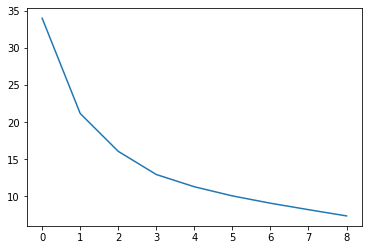

In [ ]:
# Elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(scaled_utss)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

For n_clusters = 2 The average silhouette_score is : 0.4779701755283485
For n_clusters = 3 The average silhouette_score is : 0.40900129331563595
For n_clusters = 4 The average silhouette_score is : 0.3596069747920086
For n_clusters = 5 The average silhouette_score is : 0.3384222163835047


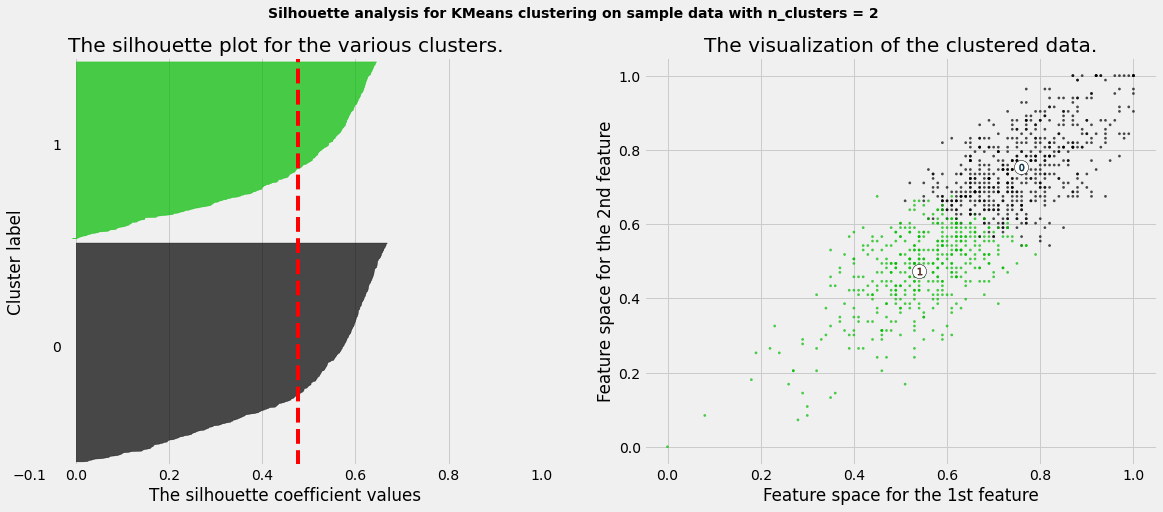

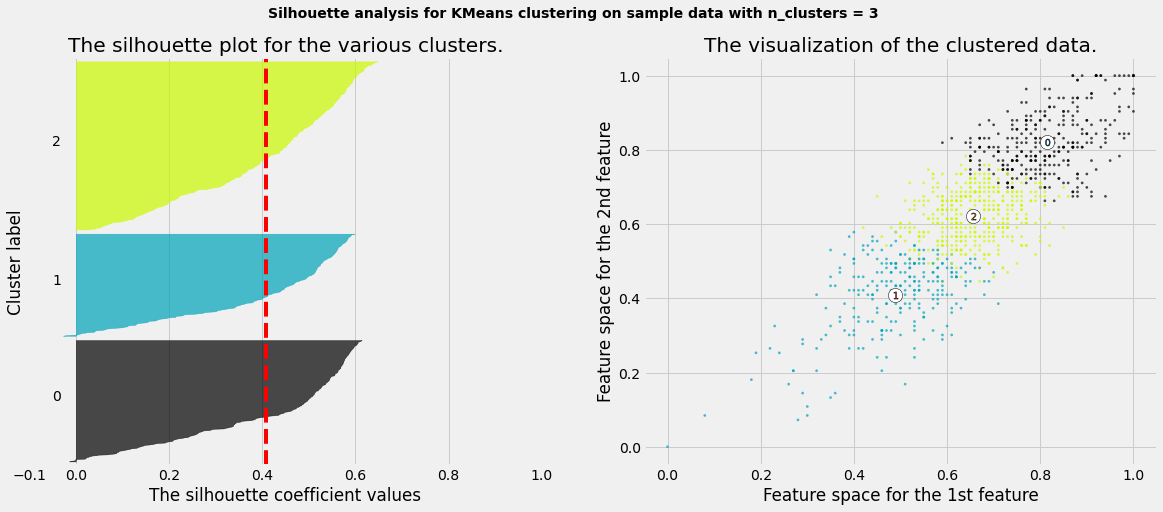

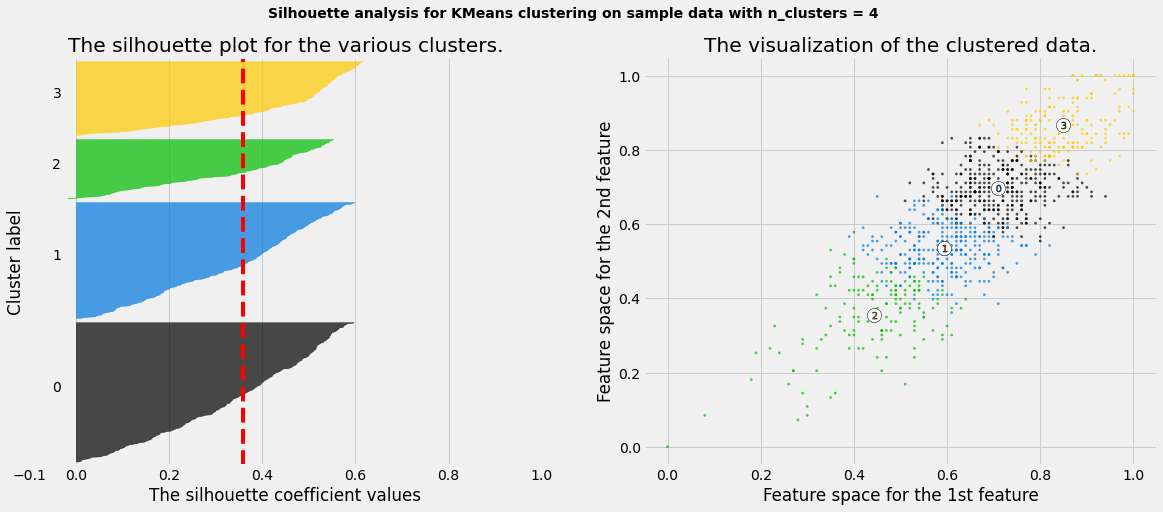

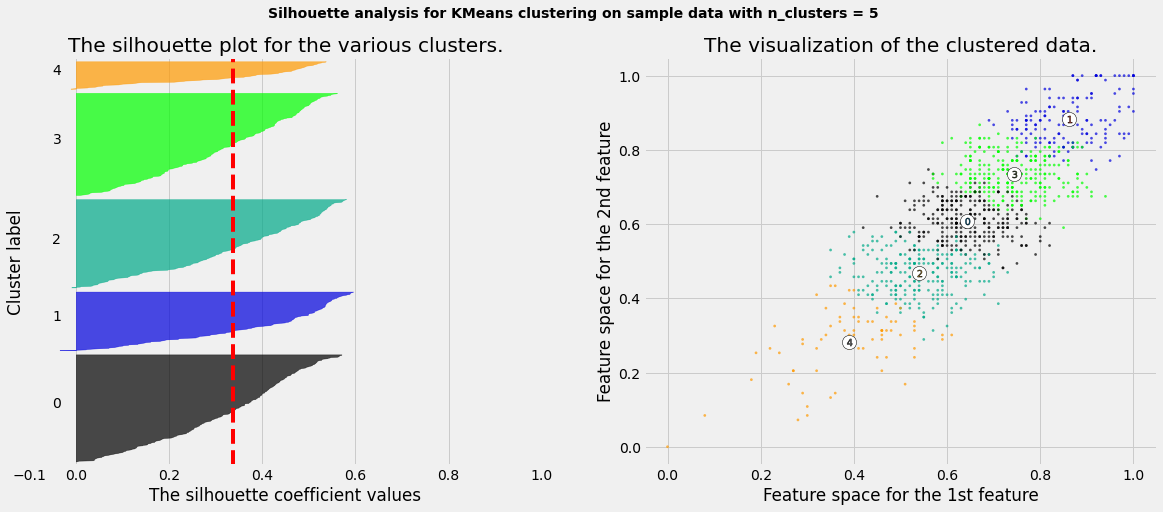

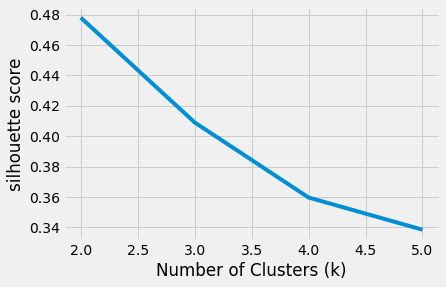

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import matplotlib.style as style

range_n_clusters = [2, 3, 4, 5]
silhouette_avg_n_clusters = []

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
     # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(scaled_utss) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(scaled_utss)

    silhouette_avg = silhouette_score(scaled_utss, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(scaled_utss, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
           
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(scaled_utss[:, 0], scaled_utss[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


style.use("fivethirtyeight")
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.show()

In [ ]:
k = KMeans(n_clusters= 2, random_state = 42)

#menampilkan nilai centroid
k.fit(scaled_utss)
print(k.cluster_centers_)

In [ ]:
sortt = np.sort(k.cluster_centers_, axis = 1)
sortt

In [ ]:
utss['kluster'] = k.labels_
print(k.labels_)

In [ ]:
print(utss.kluster)

In [ ]:
uts['cluster'] = k.labels_
uts

In [ ]:
outputt = plt.scatter(scaled_utss[:,0], scaled_utss[:,1], s = 10, c = utss.kluster )
centers = k.cluster_centers_
plt.scatter(centers[:,0], centers[0:,1], c ='red', s = 20, alpha = 1, marker = 'o')
plt.title('HASIL CLUSTERING DENGAN KMEANS')
plt.colorbar(outputt)
plt.show()

In [ ]:
k = KMeans(n_clusters= 4, random_state = 42)

#menampilkan nilai centroid
k.fit(scaled_utss)
print(k.cluster_centers_)

In [ ]:
sortt = np.sort(k.cluster_centers_, axis = 1)
sortt

In [ ]:
utss['kluster'] = k.labels_
print(k.labels_)

In [ ]:
uts['cluster'] = k.labels_
uts

In [ ]:
outputt = plt.scatter(scaled_utss[:,0], scaled_utss[:,1], s = 10, c = utss.kluster )
centers = k.cluster_centers_
plt.scatter(centers[:,0], centers[0:,1], c ='red', s = 20, alpha = 1, marker = 'o')
plt.title('HASIL CLUSTERING DENGAN KMEANS')
plt.colorbar(outputt)
plt.show()

In [ ]:
k = KMeans(n_clusters= 5, random_state = 42)

#menampilkan nilai centroid
k.fit(scaled_utss)
print(k.cluster_centers_)

In [ ]:
utss['kluster'] = k.labels_
print(k.labels_)

In [ ]:
outputt = plt.scatter(scaled_utss[:,0], scaled_utss[:,1], s = 10, c = utss.kluster )
centers = k.cluster_centers_
plt.scatter(centers[:,0], centers[0:,1], c ='red', s = 20, alpha = 1, marker = 'o')
plt.title('HASIL CLUSTERING DENGAN KMEANS')
plt.colorbar(outputt)
plt.show()

In [ ]:
silhouette_score(scaled_utss,k.labels_)

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state = 123).fit(scaled_utss)for k in range (1,10)]
silhouette_scores = [silhouette_score(scaled_utss, model.labels_) for model in kmeans_per_k[1:]]

In [ ]:
from pylab import rcParams
rcParams['figure.figsize']=16,5
plt.plot(range(2,10),silhouette_scores, "bo-", color = 'red', linewidth =3, markersize = 8, label = 'Silhouette Curve')
plt.xlabel("$k$", fontsize = 14, family = 'Arial')
plt.ylabel("Silhouette Score", fontsize = 14, family = 'Arial')
plt.grid(which = 'major', color = '#cccccc', linestyle = '--')

plt.title('Silhouette Index Data Student Performance')

k = np.argmax(silhouette_scores) + 2

plt.axvline(x = k, linestyle = '--', c = 'green', linewidth = 3, label = 'Optimal Number Of Cluster ({})'.format(k))
plt.scatter(k, silhouette_scores[k-2], c = 'red', s = 400)
plt.legend(shadow = True)
plt.show()